In [ ]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset = pd.read_csv('churn_modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
X=pd.concat([X,geography,gender],axis=1)



In [ ]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0


In [ ]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9394,597,35,8,131101.04,1,1,1,192852.67,1,0,0
898,523,40,2,102967.41,1,1,0,128702.10,0,0,0
2398,706,42,8,95386.82,1,1,1,75732.25,0,1,0
5906,788,32,4,112079.58,1,0,0,89368.59,0,0,1
2343,706,38,5,163034.82,2,1,1,135662.17,1,0,1


In [ ]:
y_test.head()

9394    0
898     1
2398    0
5906    0
2343    0
Name: Exited, dtype: int64

In [ ]:
y_train.head()

7389    0
9275    0
2995    0
5316    0
356     0
Name: Exited, dtype: int64

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

##Performing ANN

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

###Also try this classifier But Model Accuracy Not effected too much You must try This ----->
classifier.add(Dense(units=6,kernel_initializer='he_normal',activation='relu',input_dim=11))

classifier.add(Dropout(0.3))

classifier.add(Dense(units=14,kernel_initializer='he_normal',activation='relu'))

classifier.add(Dropout(0.4))


classifier.add(Dense(units=8,kernel_initializer='he_normal',activation='relu'))

classifier.add(Dropout(0.2))

classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

### To be add much more and initializer also changes to all

###Adding Dropout

classifier.add(Dropout(0.3))

###Can be Put after  Multiples of row 

In [ ]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

In [ ]:
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs= 100)


Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.7048 - accuracy: 0.6212 - val_loss: 0.5821 - val_accuracy: 0.7270
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7630 - val_loss: 0.5116 - val_accuracy: 0.7815
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4924 - accuracy: 0.7916 - val_loss: 0.4847 - val_accuracy: 0.7944
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4715 - accuracy: 0.7966 - val_loss: 0.4689 - val_accuracy: 0.7970
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4578 - accuracy: 0.8013 - val_loss: 0.4581 - val_accuracy: 0.8001
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4484 - accuracy: 0.8033 - val_loss: 0.4510 - val_accuracy: 0.8005
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4412 - accuracy: 0.8059 - val_loss: 0.4455 - val_accuracy: 0.8031

In [ ]:
classifier.save("model.h5")

## load and evaluate a saved model

In [ ]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


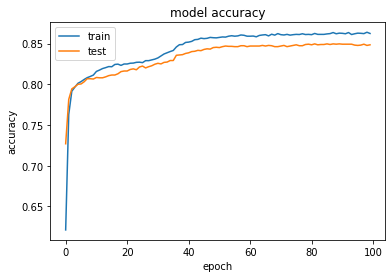

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


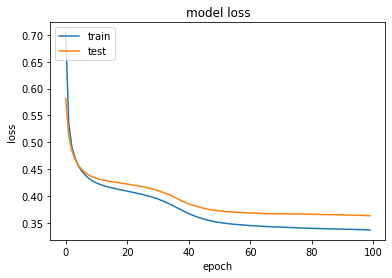

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[1532,   63],
       [ 216,  189]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.8605

In [ ]:
new_pred = classifier.predict(sc.transform(np.array([[654	,40	,5	,105683.63	,1	,1	,0	,173617.09,0,1,1]])))

###Add a threshold of 50% with the following code:

In [ ]:
new_pred = (new_pred > 0.5)
new_pred

array([[False]])

In [ ]:
new_pred = classifier.predict(sc.transform(np.array([[523	,40	,2	,102967.41	,1	,1	,0	,128702.10	,0	,0	,0]])))

In [ ]:
new_pred = (new_pred > 0.8)
new_pred

array([[False]])